## Análisis Exploratorio de Datos (EDA)

## Importación de librerías

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## Cargar dataset

In [4]:
df = pd.read_csv(r'C:\Users\Administrator\Documents\Proyecto seg clientes refuerzo\Proyecto_seg_clientes\Data\teleCust1000t.csv')


## Verificar primeras líneas del modelo

In [5]:
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Estructura del dataset

In [8]:
df.shape

(1000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


## Valores únicos

In [10]:
df.nunique()

region       3
tenure      72
age         60
marital      2
address     50
income     218
ed           5
employ      46
retire       2
gender       2
reside       8
custcat      4
dtype: int64

## Estadísticas básicas

In [11]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


## Valores nulos

In [12]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

## Duplicados

In [13]:
df.duplicated().sum()

np.int64(0)

## Histogramas

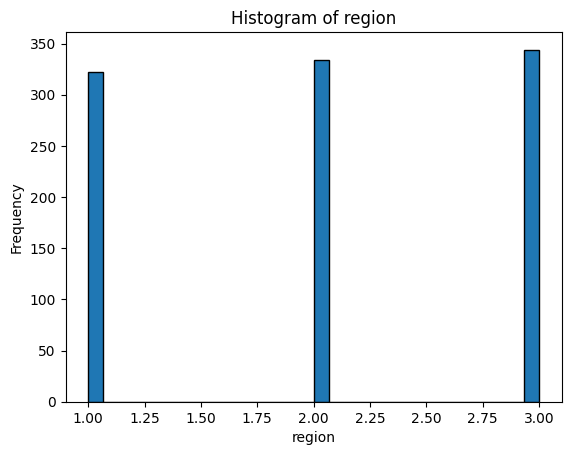

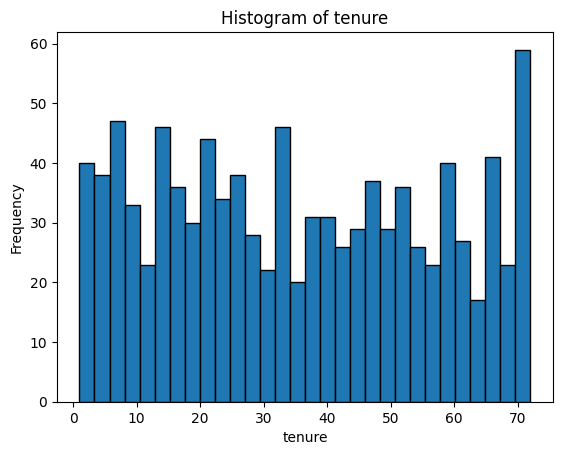

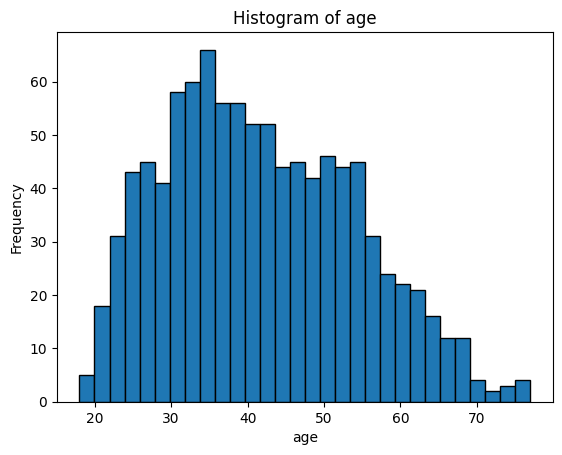

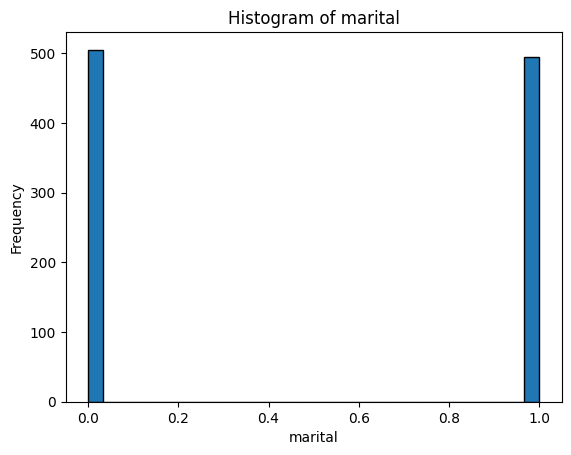

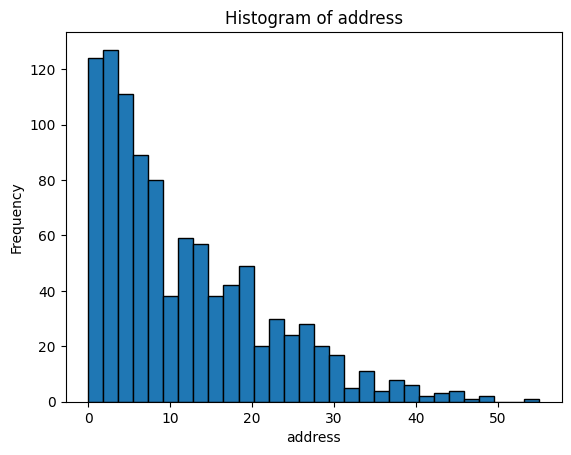

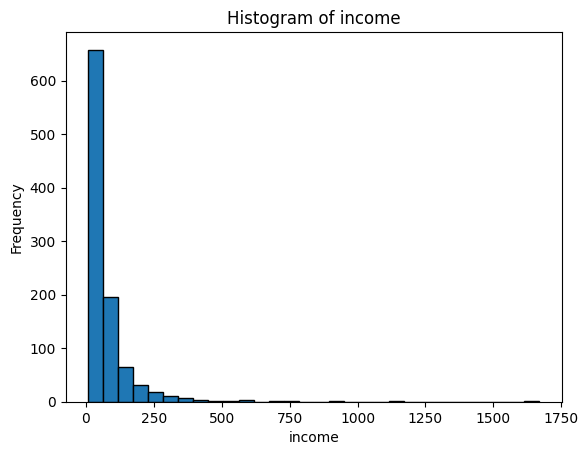

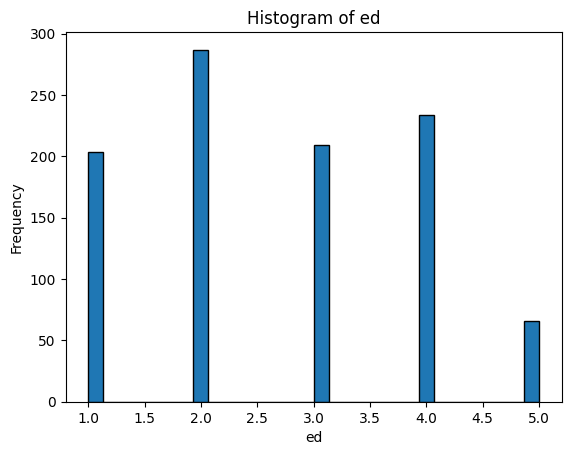

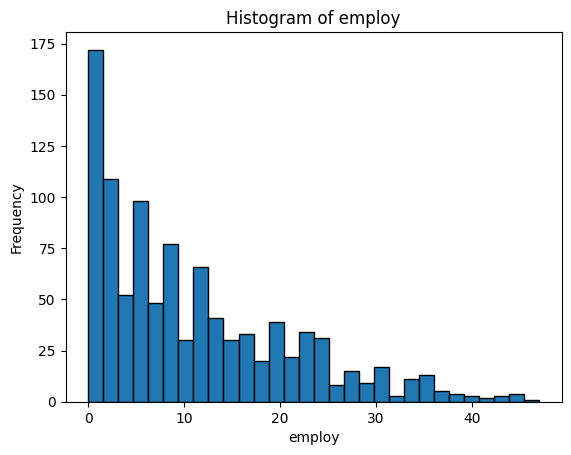

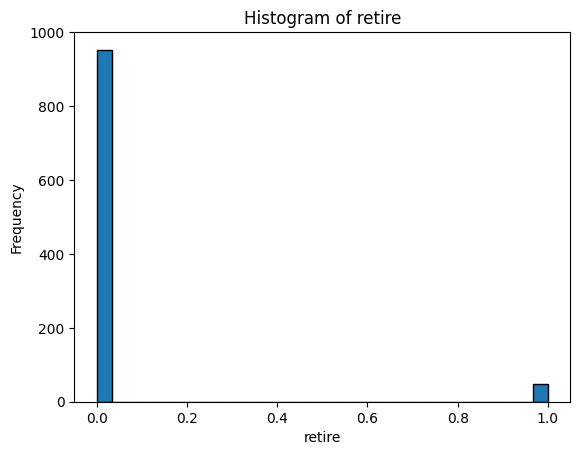

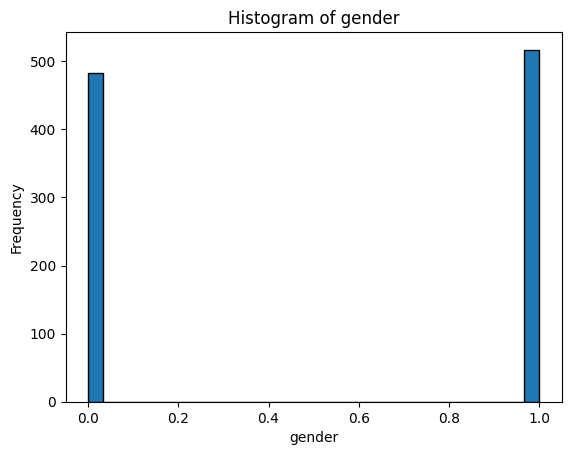

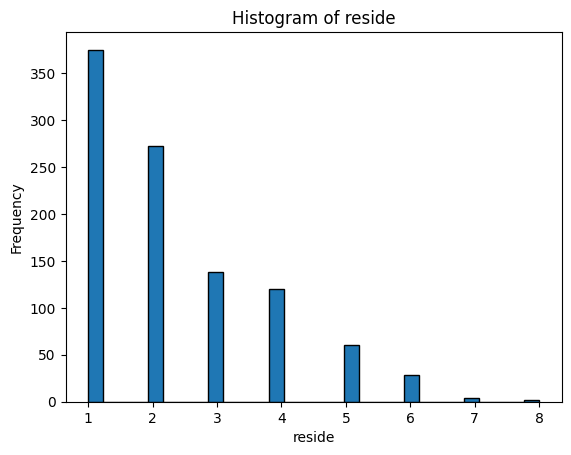

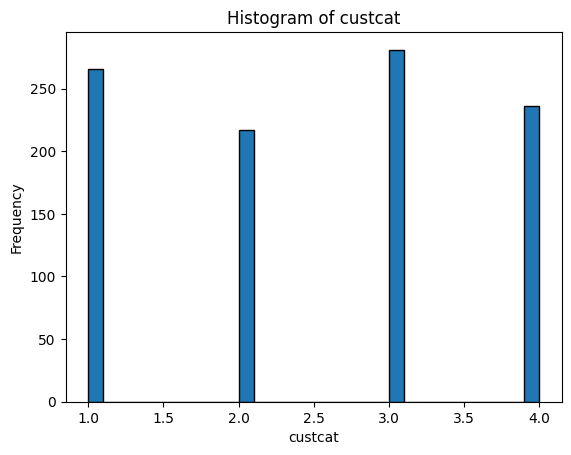

In [28]:
# Lista de las columnas numéricas
columns = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']

# Iterar sobre cada columna para graficar su histograma
for col in columns:
    df[col].hist(bins=30, edgecolor='black')  # Histograma con 30 bins
    plt.title(f'Histogram of {col}')         # Título del gráfico
    plt.xlabel(col)                          # Etiqueta del eje X
    plt.ylabel('Frequency')                  # Etiqueta del eje Y
    plt.grid(False)                          # Quitar líneas de la cuadrícula
    plt.show()



La variable objetivo se ve bastante balanceada.

## Correlación entre la columna "age" y "employ"

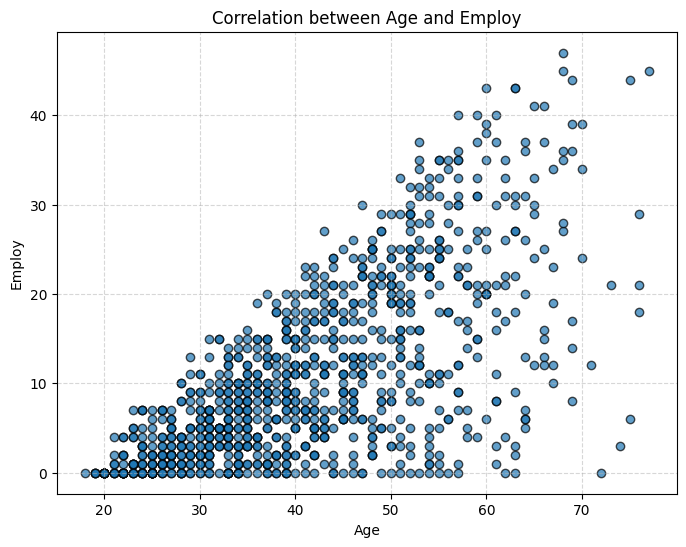

In [17]:
# Crear un gráfico de dispersión entre 'age' y 'employ'
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['employ'], alpha=0.7, edgecolor='k')
plt.title('Correlation between Age and Employ')
plt.xlabel('Age')
plt.ylabel('Employ')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Podemos concluir que existe una fuerte correlación entre la edad y la columna empleo, con lo cual podemos decir que la columna empleo probablemente sea los años de empleo que tiene la persona. 

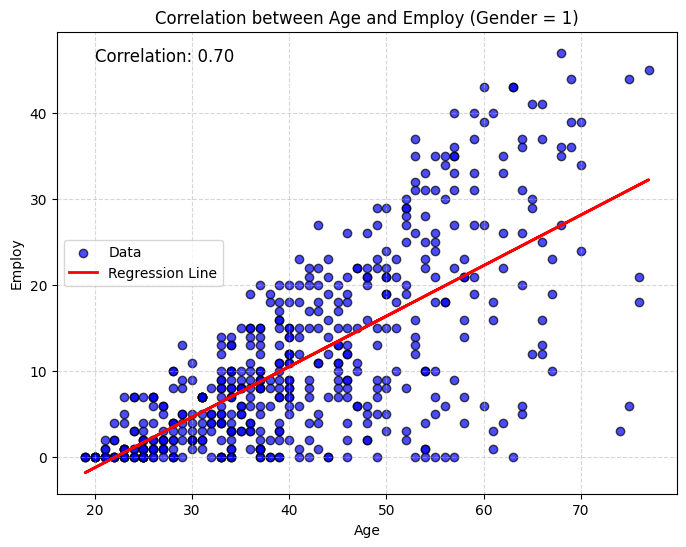

In [22]:
# Filtrar los datos donde 'gender' es igual a 1
filtered_df = df[df['gender'] == 1]

# Calcular la correlación de Pearson
corr, _ = pearsonr(filtered_df['age'], filtered_df['employ'])

# Ajustar una línea de regresión lineal
model = LinearRegression()
X = filtered_df[['age']]  # Predictor
y = filtered_df['employ']  # Respuesta
model.fit(X, y)
predictions = model.predict(X)

# Crear un gráfico de dispersión entre 'age' y 'employ' para los datos filtrados
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['age'], filtered_df['employ'], alpha=0.7, edgecolor='k', color='blue', label='Data')
plt.plot(filtered_df['age'], predictions, color='red', linewidth=2, label='Regression Line')

# Añadir el valor de la correlación en el gráfico
plt.text(min(filtered_df['age']) + 1, max(filtered_df['employ']) - 1, 
         f'Correlation: {corr:.2f}', fontsize=12, color='black')

# Títulos y etiquetas
plt.title('Correlation between Age and Employ (Gender = 1)')
plt.xlabel('Age')
plt.ylabel('Employ')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



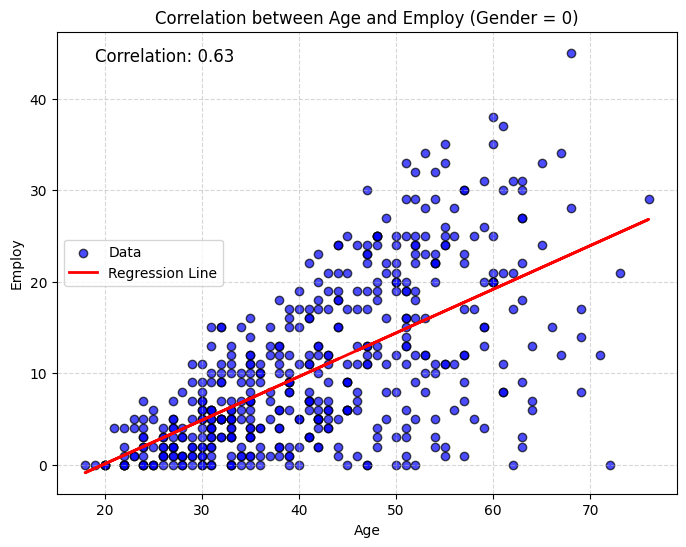

In [23]:
# Filtrar los datos donde 'gender' es igual a 1
filtered_df = df[df['gender'] == 0]

# Calcular la correlación de Pearson
corr, _ = pearsonr(filtered_df['age'], filtered_df['employ'])

# Ajustar una línea de regresión lineal
model = LinearRegression()
X = filtered_df[['age']]  # Predictor
y = filtered_df['employ']  # Respuesta
model.fit(X, y)
predictions = model.predict(X)

# Crear un gráfico de dispersión entre 'age' y 'employ' para los datos filtrados
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['age'], filtered_df['employ'], alpha=0.7, edgecolor='k', color='blue', label='Data')
plt.plot(filtered_df['age'], predictions, color='red', linewidth=2, label='Regression Line')

# Añadir el valor de la correlación en el gráfico
plt.text(min(filtered_df['age']) + 1, max(filtered_df['employ']) - 1, 
         f'Correlation: {corr:.2f}', fontsize=12, color='black')

# Títulos y etiquetas
plt.title('Correlation between Age and Employ (Gender = 0)')
plt.xlabel('Age')
plt.ylabel('Employ')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




Viendo las dos últimas gráficas podemos decir que el género con valor 1 corresponde a Hombre, ya que existe una mayor correlación entre el empleo y la edad.

## Correlación entre todas las variables

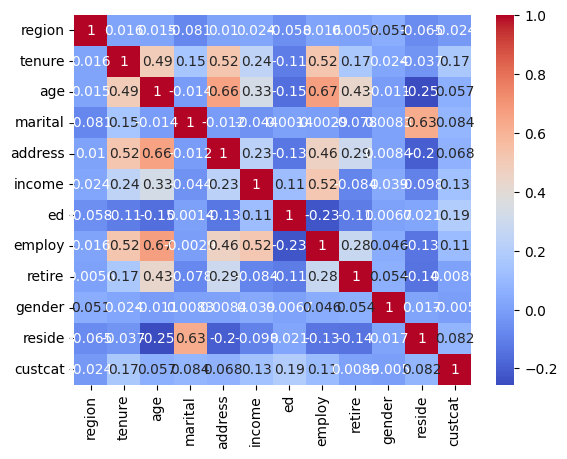

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Cambio de float a integer de la columna "retire"

In [26]:
df['retire'] = df['retire'].astype(int)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   int64  
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


## Guardar el dataset

In [30]:

df.to_csv('C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/Proyecto_seg_clientes/Data/teleCust1000t_listo.csv', index=False)

